# Data Wrangling

by Warda Gull

> Process of cleaning, 
          Transforming             
          Organizing

It helps to make data consistent and useful.

## Steps
1. Gathering data
2. Assessing the data(EDA)
3. Tools to clean data(libraries)
4. w to clean
    - Dealing with missing values
    - Correcting errors in data
        - Outliers removing 
          - Visualization 
          - IQR method 
          - Z-Score
    - Finding and Dropping Duplicates 
5. Transforming the data
    - Normalizing the data (Important)
        - Min-Max Scalling
        - Standard scaler / Z-score Normalization
        - Decimal Scalling 
        - Winsorization
        - Log Transformation
6. Organizing Data
   - Column Creation
   - Renaming 
7. Saving the processed data for future use

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')


In [3]:
df.isnull().sum() * 100 / len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### Missing values

In [4]:
# Dealing with missing values

df.drop(columns='deck', inplace=True)
df.fillna(df['age'].mean(), inplace=True)
df.fillna(df['embarked'].mode()[0] , inplace=True)
df.fillna(df['embark_town'].mode()[0], inplace=True)

df.isnull().sum() * 100 / len(df)



survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

<Axes: xlabel='age', ylabel='Count'>

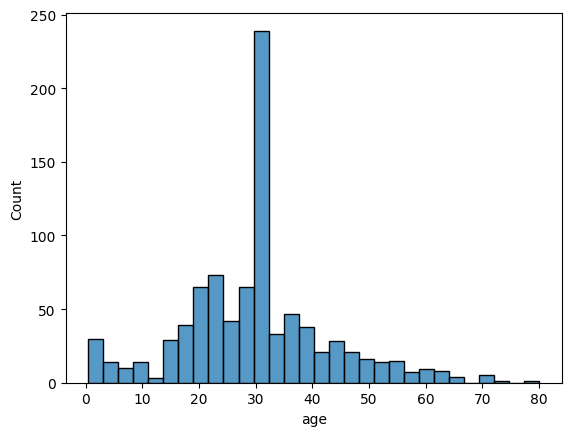

In [6]:
sns.histplot(df['age'])

In [7]:
# log transformation
#  check 1stly after applying the log transformation but its not working
df['age'] = np.log(df['age'])

<Axes: xlabel='age', ylabel='Count'>

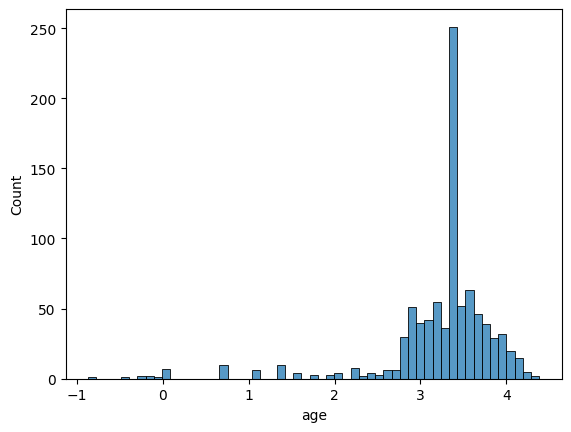

In [8]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

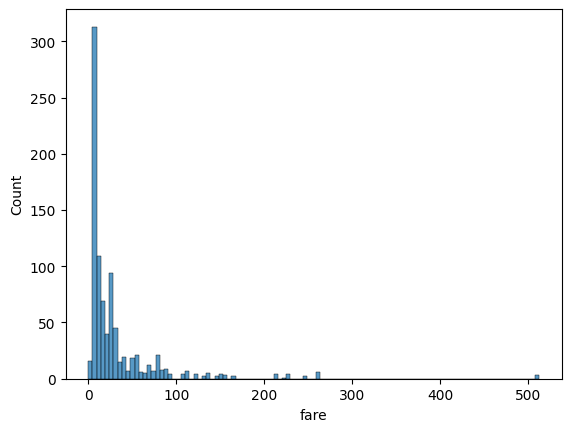

In [9]:
sns.histplot(df['fare'])

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='fare', ylabel='Count'>

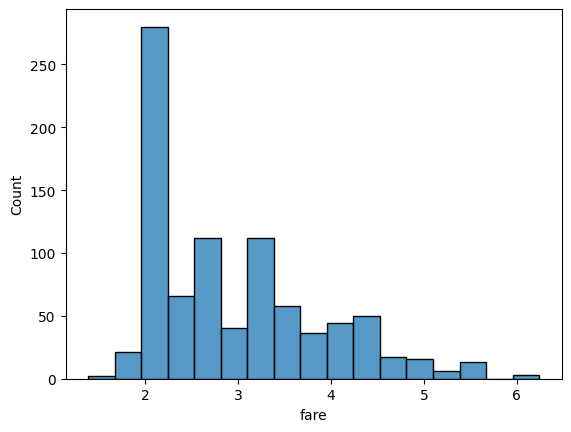

In [10]:
df['fare'] = np.log(df['fare'])
sns.histplot(df['fare'])

### Removing Outliers

<Axes: ylabel='age'>

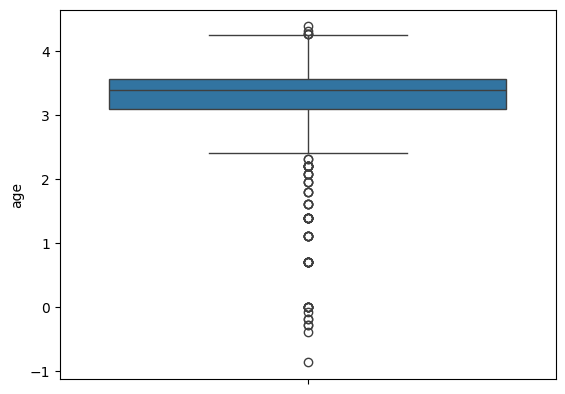

In [11]:
# Visualization

sns.boxplot( y='age' , data=df)



<Axes: ylabel='fare'>

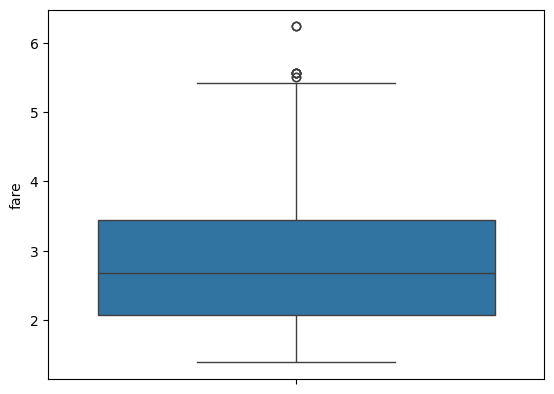

In [12]:
sns.boxplot( y='fare' , data=df)


In [13]:
# removing Outliers through IQR

Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
IQR

0.46430560813109745

In [14]:
upper_bound= Q3 +1.5*IQR
lower_bound= Q1 -1.5*IQR

print(upper_bound,lower_bound)

4.2518064736860595 2.3945840411616697


In [15]:
df=df[(df['age']< upper_bound) & (df['age']> lower_bound)]


<Axes: ylabel='age'>

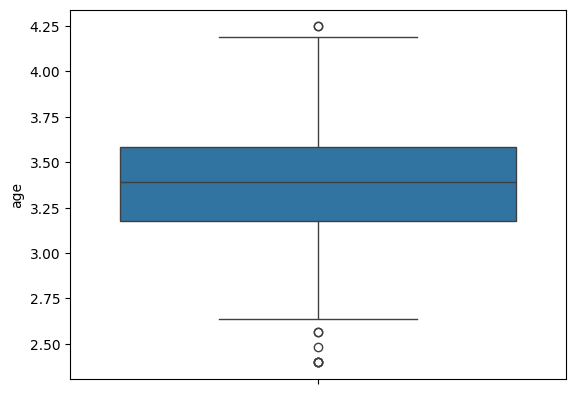

In [16]:
sns.boxplot( y='age' , data=df)


In [17]:
# removing outliers in fare
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)

IQR=Q3-Q1

upper_bound= Q3 +1.5*IQR
lower_bound= Q1 -1.5*IQR

df=df[(df['fare']< upper_bound) & (df['fare']> lower_bound)]



<Axes: ylabel='fare'>

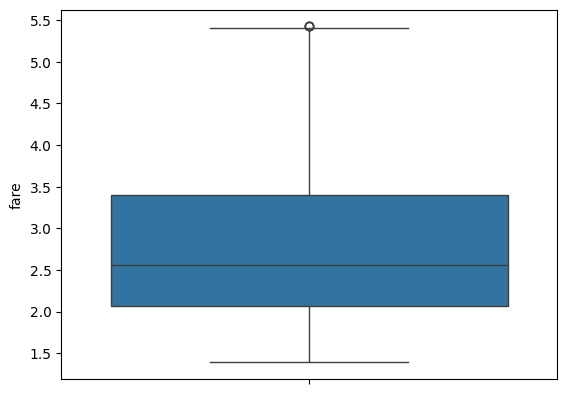

In [18]:
sns.boxplot( y='fare' , data=df)


<Axes: xlabel='fare', ylabel='Count'>

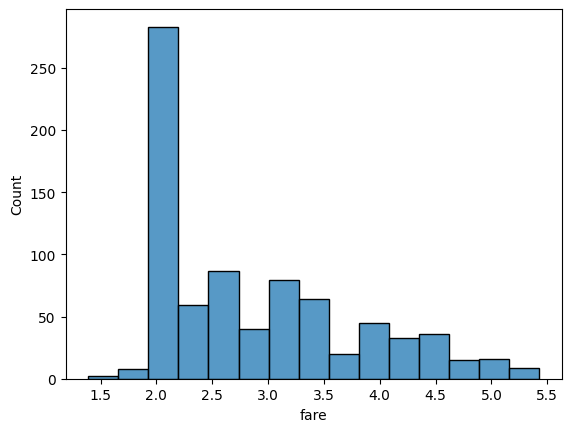

In [19]:
sns.histplot(df['fare'])

<Axes: xlabel='age', ylabel='Count'>

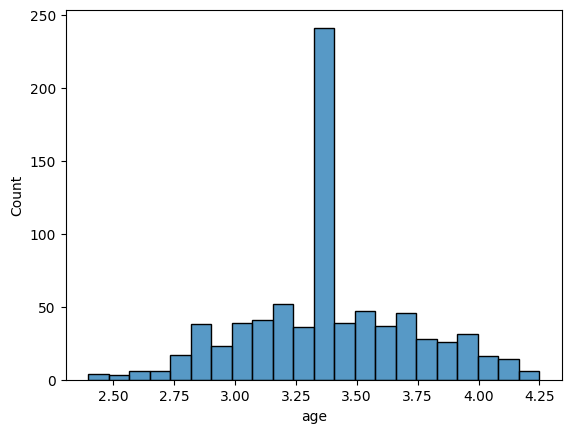

In [20]:
sns.histplot(df['age'])

In [21]:
# Z-score method
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['age']))
threshold = 3

df = df[z < threshold]



<Axes: xlabel='age', ylabel='Count'>

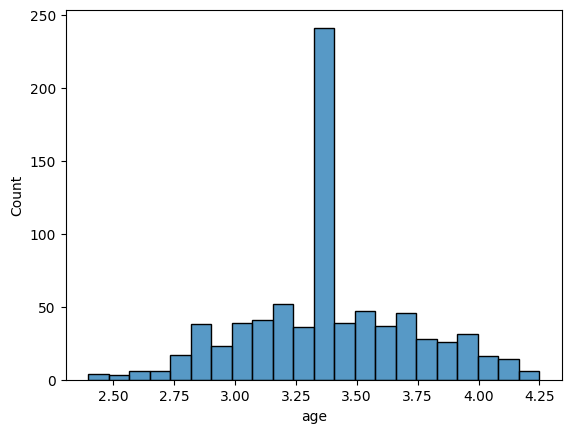

In [22]:
sns.histplot(df['age'])

In [24]:
z = np.abs(stats.zscore(df['fare']))
threshold = 3

df = df[z < threshold]

<Axes: xlabel='fare', ylabel='Count'>

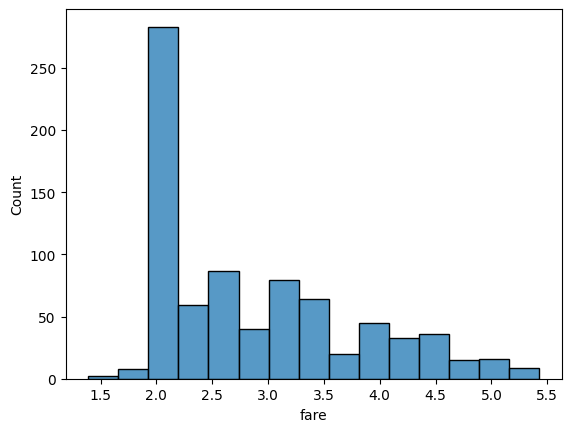

In [25]:
sns.histplot(df['fare'])

### Drop Duplicates

In [26]:
df.shape

(796, 14)

In [27]:
# finding duplicates

df.duplicated().sum()


104

In [28]:
# removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(692, 14)

# Transforming the data
# =================================
## Normalization

In [29]:
# pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler # For scalling in between 0_1

Cols=['age', 'fare']
scaler= MinMaxScaler()

df[Cols]= scaler.fit_transform(df[Cols])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.374553,1,0,0.146511,S,Third,man,True,Southampton,no,False
1,1,1,female,0.669886,1,0,0.712570,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.464823,0,0,0.168557,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.625447,1,0,0.639639,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.625447,0,0,0.172433,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.683922,0,5,0.490901,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.295333,0,0,0.498232,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.536703,1,2,0.437227,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.464823,0,0,0.498232,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

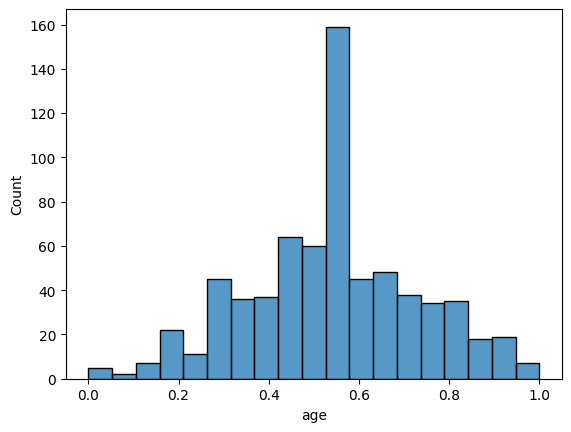

In [30]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

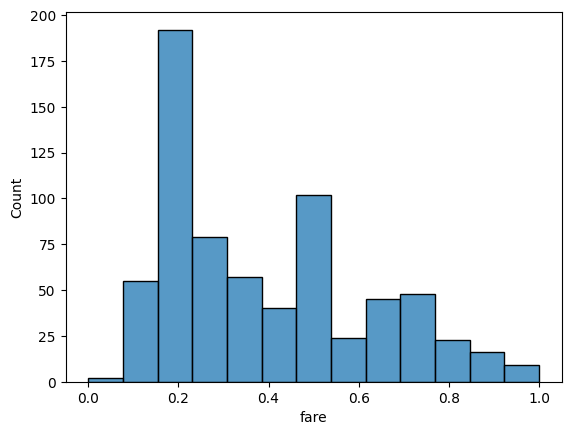

In [31]:
sns.histplot(df['fare'])

In [34]:

from sklearn.preprocessing import StandardScaler # For scalling in between -3 to +3

df1=df

Cols=['age', 'fare']
scaler= StandardScaler()

df1[Cols]= scaler.fit_transform(df[Cols])

df1

# z= x−μ/  σ

# Where:
# z is the standardized value.
# x is the original value.
# μ is the mean of the feature.
# σ is the standard deviation of the feature

#  Note: Mean of coloum will become 0 and standard deviation will become 1 after scaling of features/coloumns



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.857511,1,0,-1.058938,S,Third,man,True,Southampton,no,False
1,1,1,female,0.686405,1,0,1.431894,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.385605,0,0,-0.961926,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.454093,1,0,1.110974,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.454093,0,0,-0.944872,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.759783,0,5,0.456484,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-1.271647,0,0,0.488741,S,First,woman,False,Southampton,yes,True
888,0,3,female,-0.009838,1,2,0.220303,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.385605,0,0,0.488741,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

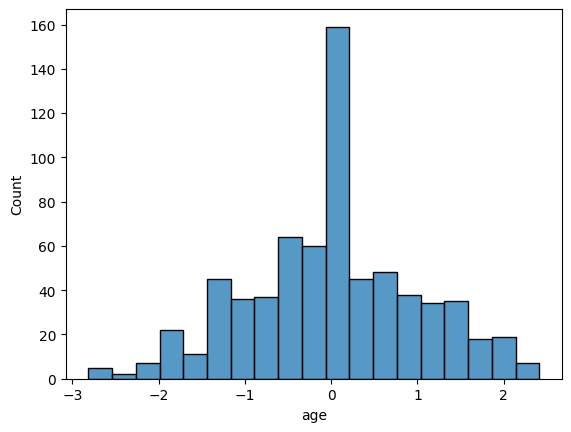

In [35]:
sns.histplot(df1['age'])

In [ ]:
# Log Transformation

#  we usually take log just after dealing wit missing values and before removing outliers

df['age']= np.log(df['age'])
df['fare']= np.log(df['fare'])

df.head()

# we usually take log1p for the data which has 0 values in it.
# It is taken only for the positive values


<Axes: xlabel='sex', ylabel='fare'>

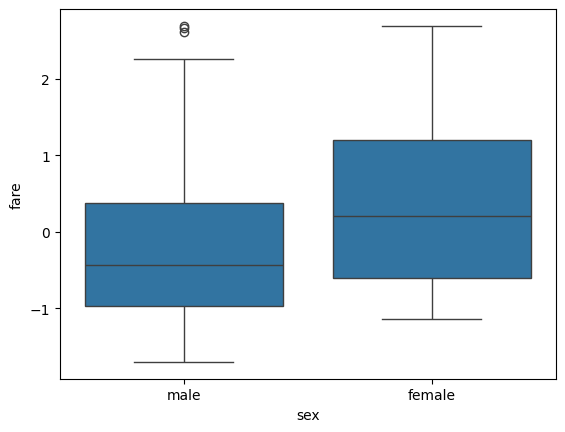

In [36]:
sns.boxplot(data=df,x='sex', y='fare')

# log is not working for age

<Axes: xlabel='sex', ylabel='age'>

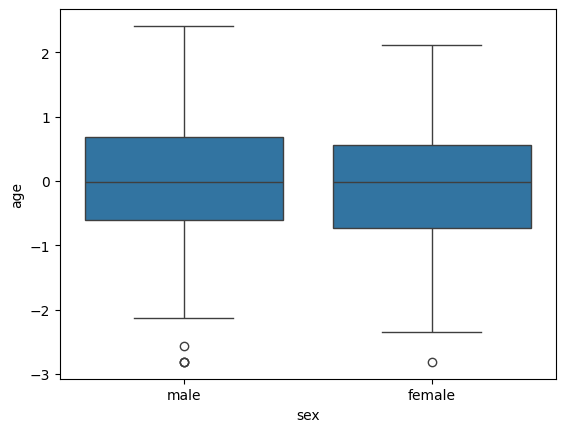

In [38]:
sns.boxplot(data=df,x='sex', y='age')


# Organizing the data

In [39]:
df['family'] = df['sibsp'] + df['parch'] 

<Axes: xlabel='family', ylabel='Count'>

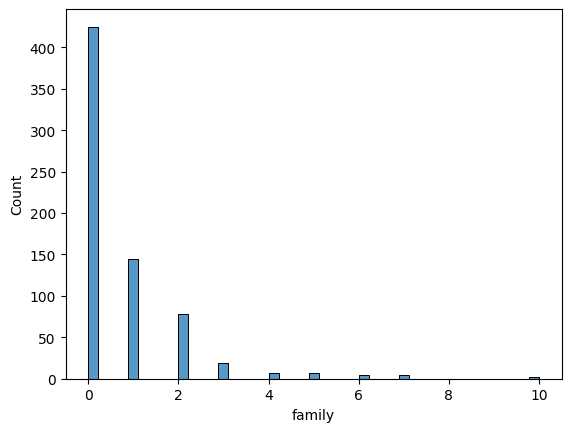

In [40]:
sns.histplot(df['family'])

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Fcc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


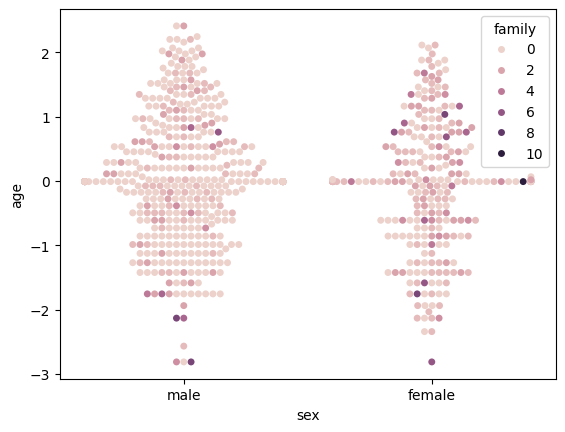

In [41]:
sns.swarmplot(data=df, x='sex', y='age', hue='family')

In [42]:
# renaming

df= df.rename(columns={'survived':'survival'})

In [43]:
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family'],
      dtype='object')

In [44]:
# Pivot table

table= pd.pivot_table(df, values='fare', columns= 'sex', index='pclass', aggfunc=np.sum)

In [45]:
table

sex,female,male
pclass,,
1,134.421059,102.881088
2,0.115322,-6.578526
3,-50.693654,-180.145290


<Axes: xlabel='fare', ylabel='age'>

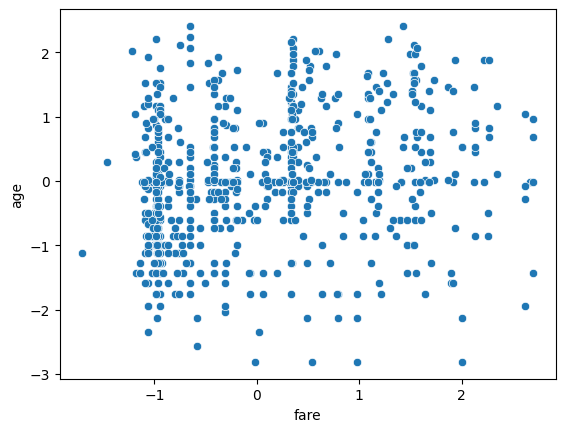

In [46]:
# checking relations

sns.scatterplot(data=df, x='fare', y='age')

In [47]:
# checked Data after wrangling
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family
0,0,3,male,-0.857511,1,0,-1.058938,S,Third,man,True,Southampton,no,False,1
1,1,1,female,0.686405,1,0,1.431894,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,-0.385605,0,0,-0.961926,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.454093,1,0,1.110974,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.454093,0,0,-0.944872,S,Third,man,True,Southampton,no,True,0


In [ ]:
# saving the data

df.to_csv('titanic_cleaned.csv')